In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Datasets/EV Maker by Place.csv")

In [3]:
df1.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [4]:
df1.shape

(62, 3)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


C:\Users\jayde\AppData\Local\Temp\ipykernel_12484\419468488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = temp.index , y = temp.values , palette="Set2")


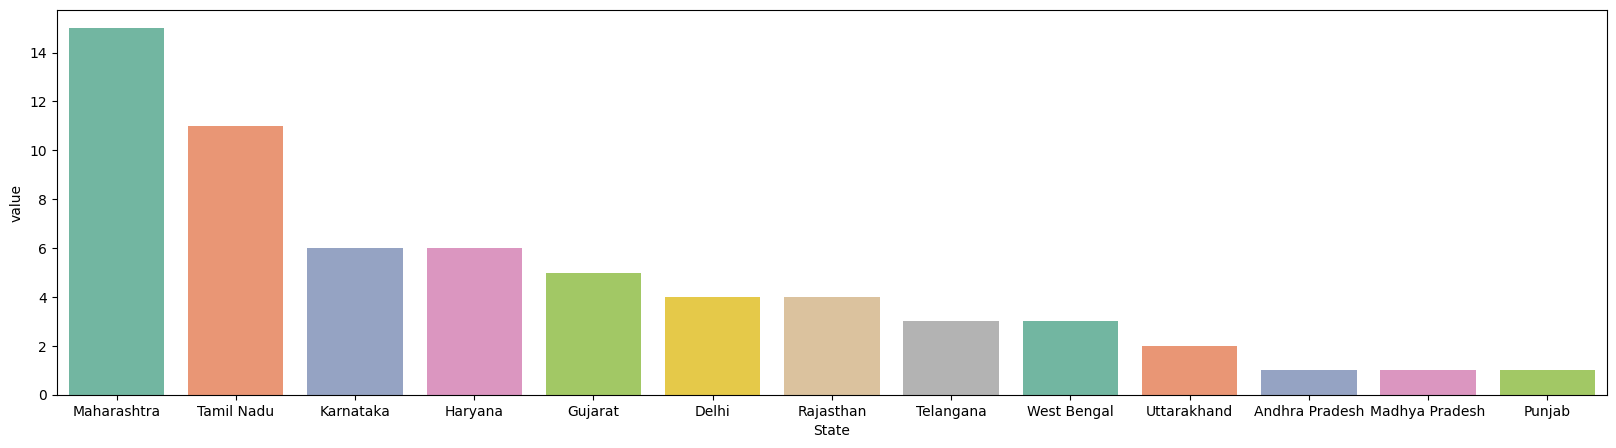

In [6]:
temp = df1["State"].value_counts()
plt.figure(figsize = (20,5))
sns.barplot(x = temp.index , y = temp.values , palette="Set2")
plt.xlabel("State")
plt.ylabel("value")
plt.show()

C:\Users\jayde\AppData\Local\Temp\ipykernel_12484\683266064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = temp.index , y = temp.values , palette="Set2")


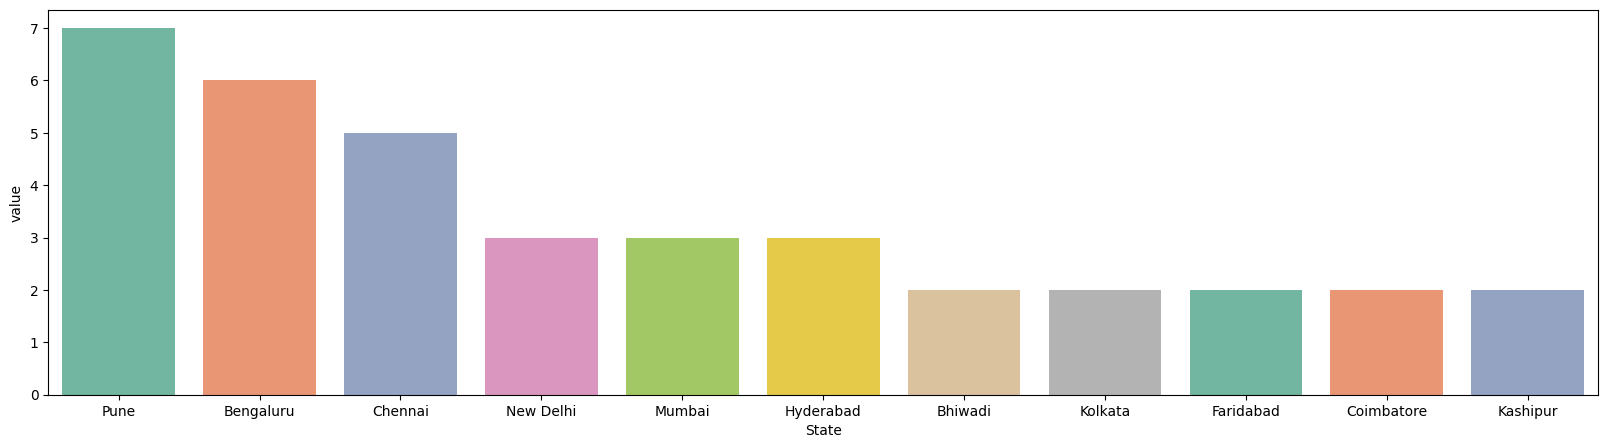

In [7]:
temp = df1["Place"].value_counts()[:11]
plt.figure(figsize = (20,5))
sns.barplot(x = temp.index , y = temp.values , palette="Set2")
plt.xlabel("State")
plt.ylabel("value")
plt.show()

In [8]:
df2 = pd.read_csv("Datasets/ev_sales_by_makers_and_cat_15-24.csv")

In [9]:
df2

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


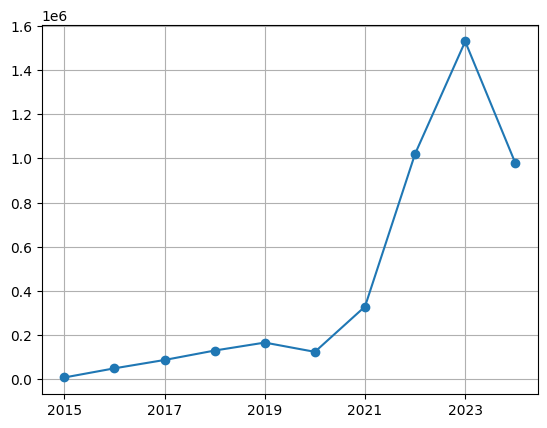

In [10]:
df2.sum()[2:].plot(kind="line",marker='o')
plt.grid(True)

In [11]:
df2["Maker"].value_counts().sort_values(ascending=False)

Maker
OTHERS                            4
TATA MOTORS LTD                   4
LECTRIX EV PVT LTD                3
NIC TEST ACCOUNT-1                3
AVON CYCLES LTD                   3
                                 ..
SHRI LAKSHMI LATHE WORKS          1
SHRI KUMAR TRAILERS EQUIPMENTS    1
SHRI KANAGA TRAILERS TANKAR       1
SHRI JYOTHI ENG. WORKS.           1
ZOHAN TRADERS AND BIG METRO       1
Name: count, Length: 1196, dtype: int64

In [12]:
temp = df2.drop(columns=['Cat','Maker']).groupby(df2.index).sum().sum(axis=1).sort_values(ascending=False).head(5).index

In [13]:
top_maker = df2.iloc[temp].drop(columns=["Cat","Maker"])

In [14]:
top_maker

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
867,0,0,0,0,0,0,240,109398,267355,211273
1230,165,171,69,23,30,233,5258,47182,166580,98516
118,0,0,0,24,2291,3052,15930,51808,104735,58547
472,1,34,162,5785,11155,8247,46260,97828,29964,2211
864,0,1,331,8452,11850,5754,30659,103620,31616,3893


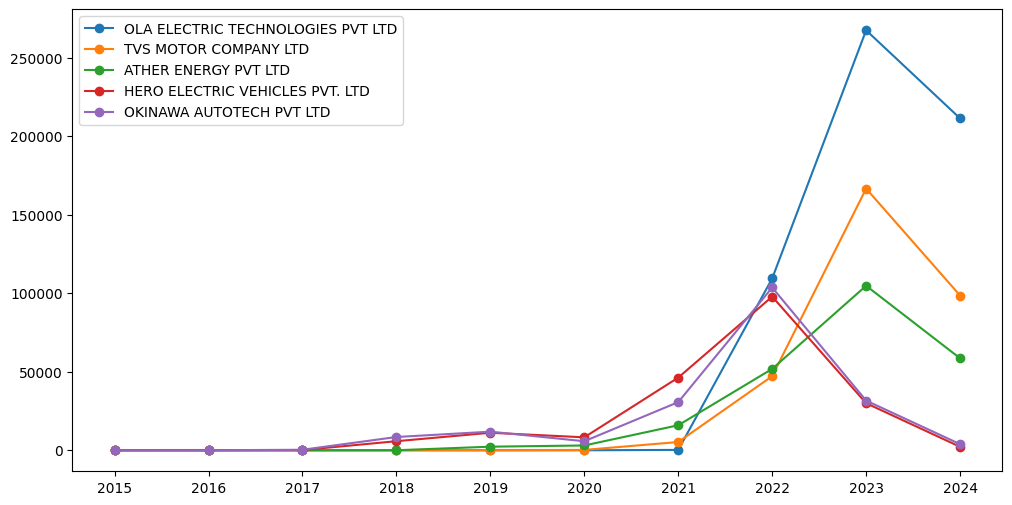

In [15]:
plt.figure(figsize=(12, 6))
for maker in range(len(top_maker.index)):
    plt.plot(top_maker.columns, top_maker.iloc[maker], marker='o', label=df2.loc[temp[maker], 'Maker'])
plt.legend()
plt.show()

In [16]:
temp = df2.groupby("Cat").sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).index

In [17]:
top_cate = df2.groupby("Cat").sum(numeric_only=True).loc[temp]

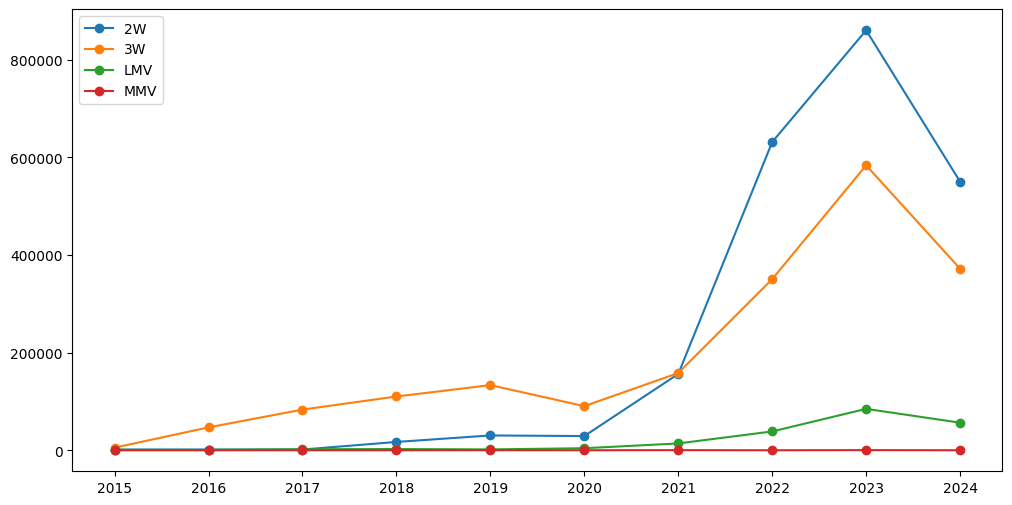

In [18]:
plt.figure(figsize=(12, 6))
for maker in top_cate.index:
    plt.plot(top_cate.columns, top_cate.loc[maker], marker='o', label=maker)
plt.legend()
plt.show()

In [19]:
df2[df2["Cat"] == "2W"].groupby(["Maker"]).sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(5)

Maker
OLA ELECTRIC TECHNOLOGIES PVT LTD    588266
TVS MOTOR COMPANY LTD                318227
ATHER ENERGY PVT LTD                 236387
HERO ELECTRIC VEHICLES PVT. LTD      201647
OKINAWA AUTOTECH PVT LTD             196176
dtype: int64

In [20]:
df2[(df2['Cat'] == "2W") & (df2['Maker'] == "OLA ELECTRIC TECHNOLOGIES PVT LTD")]

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
867,2W,OLA ELECTRIC TECHNOLOGIES PVT LTD,0,0,0,0,0,0,240,109398,267355,211273


In [21]:
top_cate_Maker = {}
for cate in df2["Cat"].unique():
    temp = df2[df2["Cat"] == cate].groupby(["Maker"]).sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(5).index
    top_cate_Maker[cate] = temp

In [22]:
top_cate_Maker

{'3W': Index(['YC ELECTRIC VEHICLE', 'SAERA ELECTRIC AUTO PVT LTD',
        'MAHINDRA & MAHINDRA LIMITED', 'DILLI ELECTRIC AUTO PVT LTD',
        'CHAMPION POLY PLAST'],
       dtype='object', name='Maker'),
 '2W': Index(['OLA ELECTRIC TECHNOLOGIES PVT LTD', 'TVS MOTOR COMPANY LTD',
        'ATHER ENERGY PVT LTD', 'HERO ELECTRIC VEHICLES PVT. LTD',
        'OKINAWA AUTOTECH PVT LTD'],
       dtype='object', name='Maker'),
 'LMV': Index(['TATA PASSENGER ELECTRIC MOBILITY LTD',
        'TATA MOTORS PASSENGER VEHICLES LTD', 'MG MOTOR INDIA PVT LTD',
        'TATA MOTORS LTD', 'MAHINDRA & MAHINDRA LIMITED'],
       dtype='object', name='Maker'),
 'MMV': Index(['TATA MOTORS LTD', 'OLECTRA GREENTECH LTD', 'ALL TERRAIN CRANE',
        'VE COMMERCIAL VEHICLES LTD', 'VEERA VAHANA UDYOG PRIVATE LIMITED'],
       dtype='object', name='Maker')}

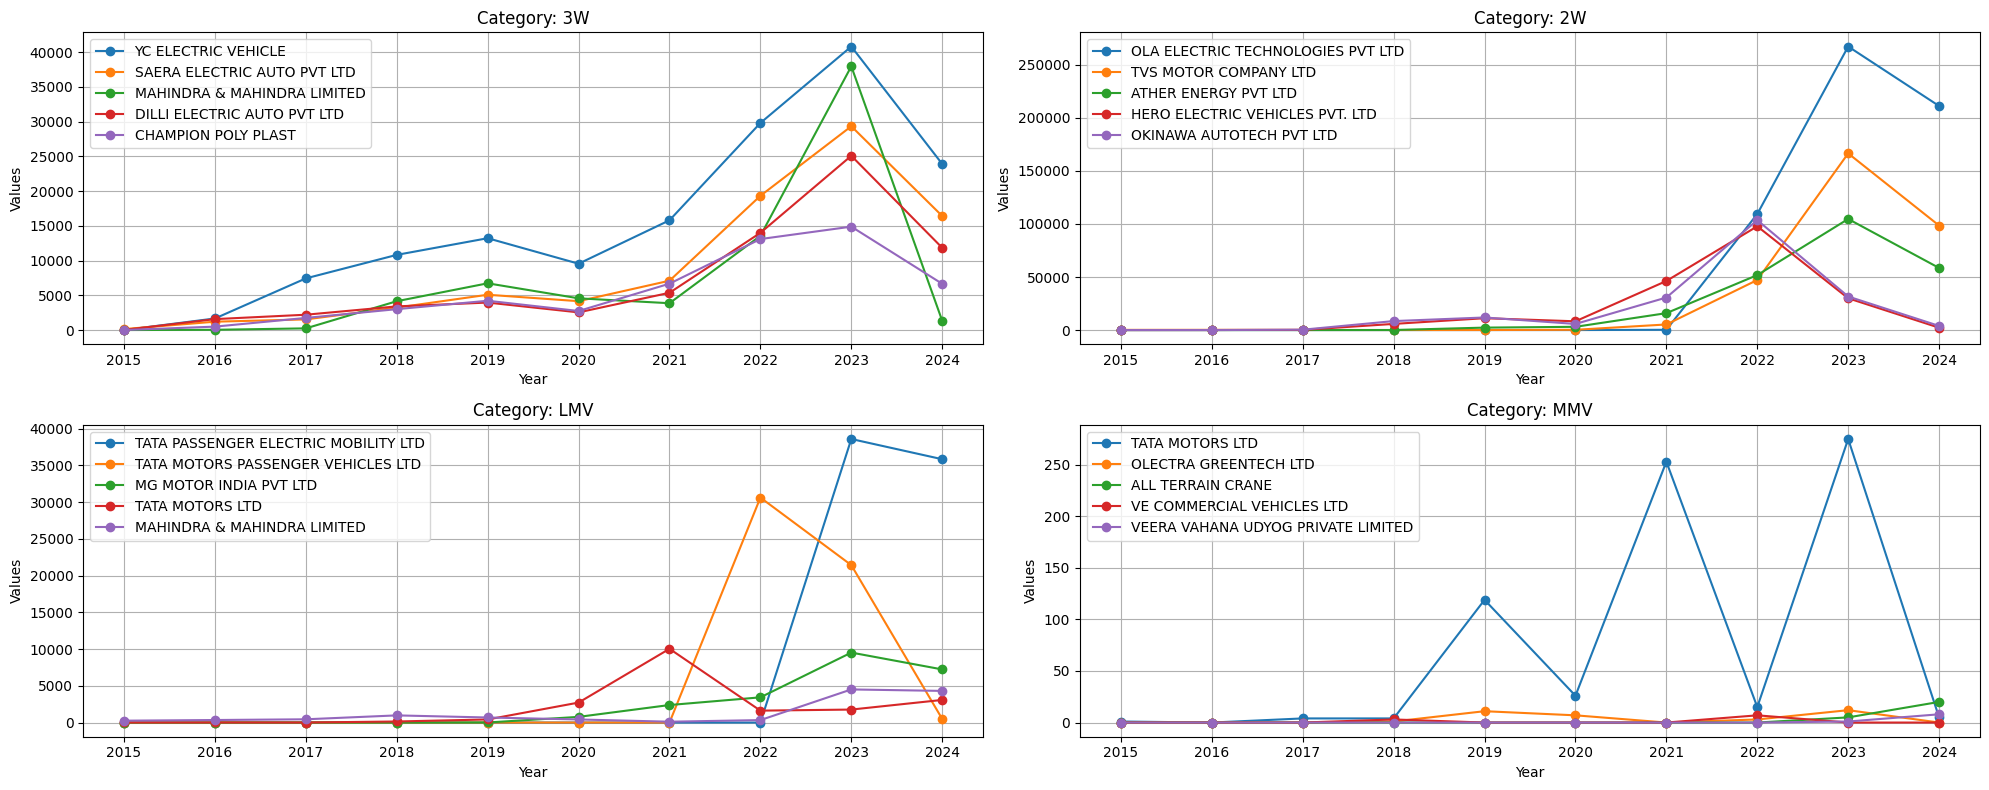

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20, 8))
ax = ax.flatten()
axis=0
for i ,maker in top_cate_Maker.items():
    
    for single_maker in maker:
        main_data = df2[(df2['Cat'] == i) & (df2['Maker'] ==single_maker)]
        ax[axis].plot(main_data.columns[2:], main_data.iloc[0, 2:], marker='o', label=single_maker)
        ax[axis].set_title(f"Category: {i}", fontsize=12)
        ax[axis].set_xlabel("Year")
        ax[axis].set_ylabel("Values")
        ax[axis].legend()
        ax[axis].grid(True)
    axis+=1
plt.tight_layout()
plt.show()

In [24]:
main_data

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1269,MMV,VEERA VAHANA UDYOG PRIVATE LIMITED,0,0,0,0,0,0,0,0,1,8


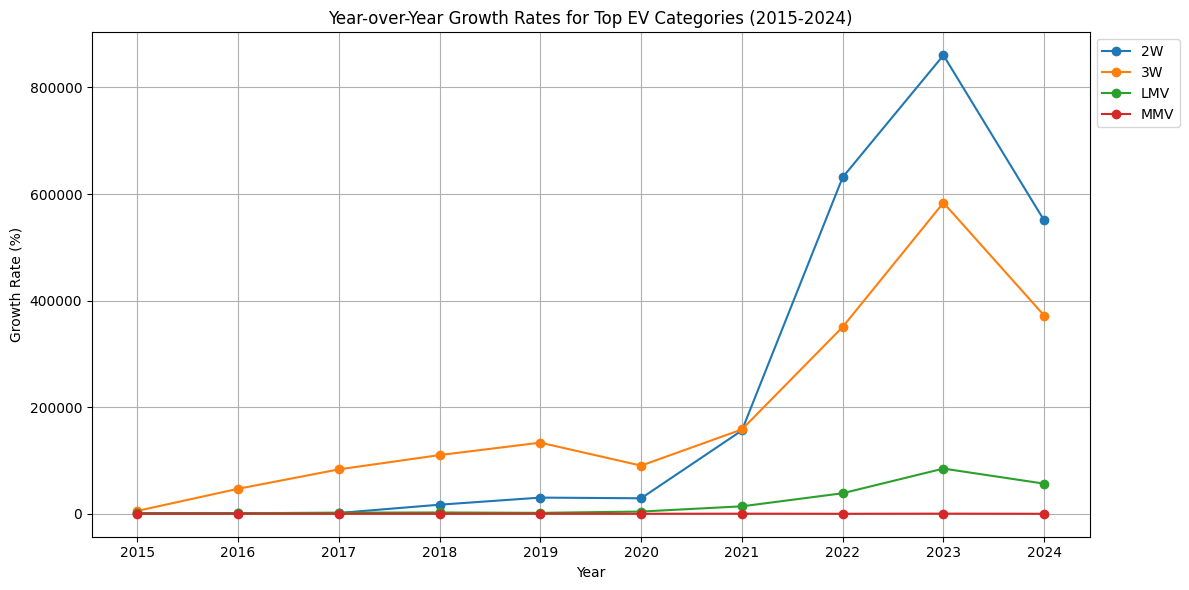

In [25]:
temp = df2.drop(columns=["Maker"]).groupby("Cat").sum()
plt.figure(figsize=(12, 6))
for category in temp.index:
    plt.plot(temp.columns, temp.loc[category], marker='o', label=category)

plt.title('Year-over-Year Growth Rates for Top EV Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

- Karnataka, Maharashtra, and Tamil Nadu have the most EV manufacturers, especially in cities like Bengaluru and Pune.

- EV sales surged significantly after 2020, showing rapid adoption due to policy support and rising demand.

- Ola Electric, Hero Electric, and others are top EV makers, especially in the two-wheeler segment.

- 2-wheelers dominate the market, followed by 3-wheelers; 4-wheelers have lower adoption so far.

- Top 5 makers in each category were identified, showing consistent leadership or rapid growth.

- Year-over-year plots reveal strong growth in 2W sales, with 3W and 4W growing more slowly.

- The overall market trend shows India’s EV sector is expanding, with 2W leading the transformation.